In [164]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import os 

# 1. functions 

In [165]:
def load_or_fetch_data(csv_file_path: str, api_url: str) -> pd.DataFrame:
    """
    Load data from a CSV file if it exists. If the file does not exist, 
    fetch data from an API, save it to the CSV file, and return it as a DataFrame.

    Args:
        csv_file_path (str): The path to the CSV file.
        api_url (str): The base URL of the API to fetch data from.

    Returns:
        pd.DataFrame: The data loaded from the CSV or fetched from the API.
    """
    if os.path.exists(csv_file_path):
        print(f"CSV file '{csv_file_path}' found. Loading data from CSV.")
        return pd.read_csv(csv_file_path)
    else:
        print(f"CSV file '{csv_file_path}' not found. Fetching data from API.")

        results = []
        page = 1

        while True:
            response = requests.get(f'{api_url}?page={page}')
            data = response.json()

            if 'results' in data and len(data['results']) > 0:
                results.extend(data['results'])
                page += 1
            else:
                break

        if not os.path.exists(os.path.dirname(csv_file_path)):
            os.makedirs(os.path.dirname(csv_file_path))

        df = pd.DataFrame(results)
        df.to_csv(csv_file_path, index=False)
        print(f"Data fetched and saved to '{csv_file_path}'.")
        return df




cleaning 

In [166]:
def rnm_cleaning(rnm: pd.DataFrame) -> pd.DataFrame:
    """
    Cleans the 'rnm' DataFrame by:
    1. Dropping unnecessary columns: 'type', 'origin', 'location', 'image', 'episode', and 'url'.
    2. Converting the 'created' column to a datetime format.
    3. Adding a new boolean column 'is_human' based on the 'species' column.
    
    Args:
        rnm (pd.DataFrame): The input DataFrame to be cleaned.
    
    Returns:
        pd.DataFrame: The cleaned DataFrame with dropped columns, converted 'created' column,
                      and the added 'is_human' column.
    """
    cols_to_drop = ['type', 'origin', 'location', 'image', 'episode', 'url']
    rnm = rnm.drop(columns=cols_to_drop)

    rnm['created'] = pd.to_datetime(rnm['created']).dt.date
    rnm['created'] = pd.to_datetime(rnm['created'])

    rnm['is_human'] = rnm['species'] == 'Human'
    return rnm



# 2. Reading in data 
commented out as we converted it to a function

In [167]:
# csv_file_path = "data/rick_n_morty.csv"

# if os.path.exists(csv_file_path):
#     print(f"CSV file '{csv_file_path}' found. Loading data from CSV.")
#     data = pd.read_csv(csv_file_path)
# else:
#     print(f"CSV file '{csv_file_path}' not found. Fetching data from API.")
    
#     url = 'https://rickandmortyapi.com/api/character'
#     results = []
#     page = 1

#     while True:
#         response = requests.get(f'{url}?page={page}')
#         data = response.json()

#         if 'results' in data and len(data['results']) > 0:
#             results.extend(data['results'])
#             page += 1
#         else:
#             break

#     if not os.path.exists("data"):
#         os.makedirs("data")

#     data = pd.DataFrame(results)
#     data.to_csv(csv_file_path, index=False)
#     print(f"Data fetched and saved to '{csv_file_path}'.")

# Testing functions 

In [168]:
csv_path = "data/rick_n_morty.csv"
api_endpoint = "https://rickandmortyapi.com/api/character"
rnm = load_or_fetch_data(csv_path, api_endpoint)

cleaned_rnm = rnm_cleaning(rnm)

CSV file 'data/rick_n_morty.csv' found. Loading data from CSV.


In [169]:
cleaned_rnm.head()

id          name status species  gender    created  is_human
0   1  Rick Sanchez  Alive   Human    Male 2017-11-04      True
1   2   Morty Smith  Alive   Human    Male 2017-11-04      True
2   3  Summer Smith  Alive   Human  Female 2017-11-04      True
3   4    Beth Smith  Alive   Human  Female 2017-11-04      True
4   5   Jerry Smith  Alive   Human    Male 2017-11-04      True

In [170]:
rnm.head(1)

id          name status species type gender  \
0   1  Rick Sanchez  Alive   Human  NaN   Male   

                                              origin  \
0  {'name': 'Earth (C-137)', 'url': 'https://rick...   

                                            location  \
0  {'name': 'Citadel of Ricks', 'url': 'https://r...   

                                               image  \
0  https://rickandmortyapi.com/api/character/avat...   

                                             episode  \
0  ['https://rickandmortyapi.com/api/episode/1', ...   

                                           url                   created  
0  https://rickandmortyapi.com/api/character/1  2017-11-04T18:48:46.250Z

We have a bunch of columns we don't need with URLs. 

# 3. Cleaning 

In [171]:
rnm.columns

Index(['id', 'name', 'status', 'species', 'type', 'gender', 'origin',
       'location', 'image', 'episode', 'url', 'created'],
      dtype='object')

In [172]:
# dropping the columns we dont need
cols_to_drop = ['type', 'origin', 'location', 'image', 'episode', 'url']
rnm = rnm.drop(columns=cols_to_drop)

rnm.head(2)

id          name status species gender                   created
0   1  Rick Sanchez  Alive   Human   Male  2017-11-04T18:48:46.250Z
1   2   Morty Smith  Alive   Human   Male  2017-11-04T18:50:21.651Z

We need to convert to created column to date time so its just the date 

In [173]:
rnm['created'] = pd.to_datetime(rnm['created']).dt.date
rnm['created'] = pd.to_datetime(rnm['created'])

rnm

id          name   status species      gender    created
0      1  Rick Sanchez    Alive   Human        Male 2017-11-04
1      2   Morty Smith    Alive   Human        Male 2017-11-04
2      3  Summer Smith    Alive   Human      Female 2017-11-04
3      4    Beth Smith    Alive   Human      Female 2017-11-04
4      5   Jerry Smith    Alive   Human        Male 2017-11-04
..   ...           ...      ...     ...         ...        ...
821  822   Young Jerry  unknown   Human        Male 2021-11-02
822  823    Young Beth  unknown   Human      Female 2021-11-02
823  824    Young Beth  unknown   Human      Female 2021-11-02
824  825   Young Jerry  unknown   Human        Male 2021-11-02
825  826  Butter Robot    Alive   Robot  Genderless 2021-11-02

[826 rows x 6 columns]

confirm that created is in date time. 

In [174]:
rnm.dtypes

id                  int64
name               object
status             object
species            object
gender             object
created    datetime64[ns]
dtype: object

Checking for null values 

In [175]:
print(rnm.isnull().any().any())

False


Calculating a new column based on species. 

In [176]:
rnm['is_human'] = rnm['species'] == 'Human'
rnm

id          name   status species      gender    created  is_human
0      1  Rick Sanchez    Alive   Human        Male 2017-11-04      True
1      2   Morty Smith    Alive   Human        Male 2017-11-04      True
2      3  Summer Smith    Alive   Human      Female 2017-11-04      True
3      4    Beth Smith    Alive   Human      Female 2017-11-04      True
4      5   Jerry Smith    Alive   Human        Male 2017-11-04      True
..   ...           ...      ...     ...         ...        ...       ...
821  822   Young Jerry  unknown   Human        Male 2021-11-02      True
822  823    Young Beth  unknown   Human      Female 2021-11-02      True
823  824    Young Beth  unknown   Human      Female 2021-11-02      True
824  825   Young Jerry  unknown   Human        Male 2021-11-02      True
825  826  Butter Robot    Alive   Robot  Genderless 2021-11-02     False

[826 rows x 7 columns]

# 4. Plotting 

In [ ]:
def plot_species_and_human_distribution(cleaned_rnm: pd.DataFrame) -> None:
    """
    Plots the distribution of species and human vs non-human data.

    This function creates a set of two pie charts:
    1. The first chart shows the distribution of species in the dataset.
    2. The second chart shows the distribution of 'is_human' values, 
       labeling them as 'Human' and 'Non-Human'.

    Args:
        cleaned_rnm (pd.DataFrame): A DataFrame containing the 'species' and 'is_human' columns.

    Returns:
        None: The function generates and displays two pie charts.
    """
    # Count the values in 'species' and 'is_human'
    species_counts = cleaned_rnm['species'].value_counts()
    is_human_counts = cleaned_rnm['is_human'].value_counts()

    # Define the subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot for 'species' 
    axes[0].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=210,
                labeldistance=1.2)  
    axes[0].set_title('Species Distribution')

    # Plot for 'is_human'
    axes[1].pie(is_human_counts, labels=is_human_counts.index.map({True: 'Human', False: 'Non-Human'}),
                autopct='%1.1f%%', startangle=90, labeldistance=1.1)  
    axes[1].set_title('Human vs Non-Human')

    plt.tight_layout()
    plt.show()


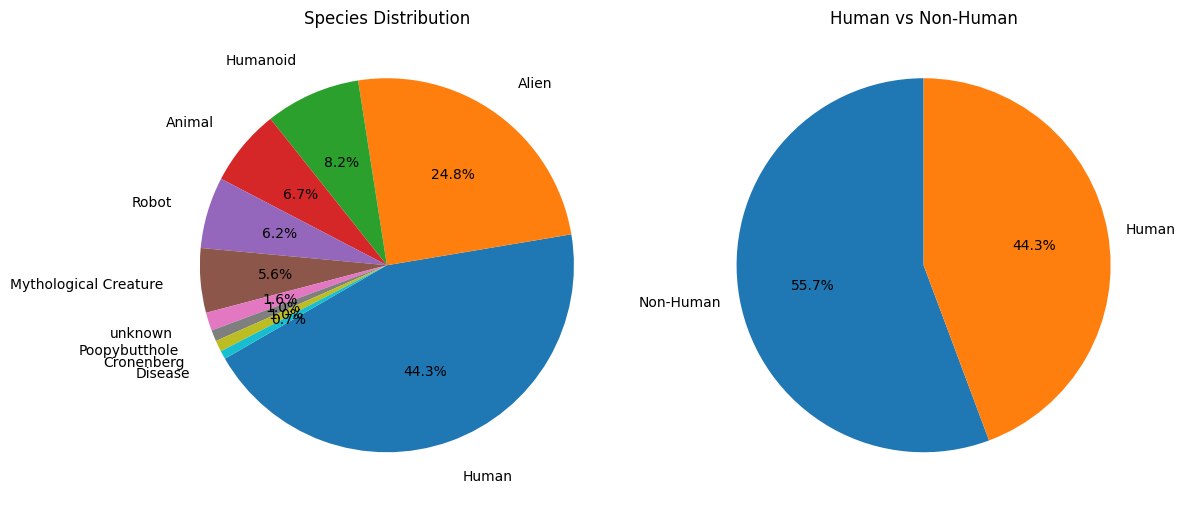

In [183]:
plot_species_and_human_distribution(cleaned_rnm)

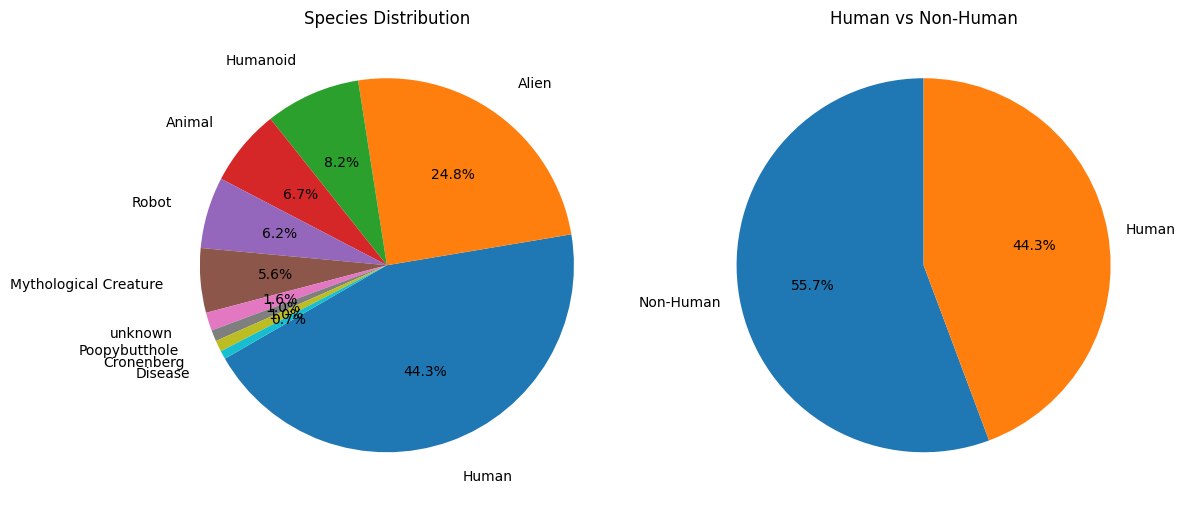

In [ ]:
# Count the values in 'species' and 'is_human'
species_counts = cleaned_rnm['species'].value_counts()
is_human_counts = cleaned_rnm['is_human'].value_counts()

# Defines the subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'species' 
axes[0].pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=210,
            labeldistance=1.2)  
axes[0].set_title('Species Distribution')

# Plot for 'is_human'
axes[1].pie(is_human_counts, labels=is_human_counts.index.map({True: 'Human', False: 'Non-Human'}),
            autopct='%1.1f%%', startangle=90, labeldistance=1.1)  
axes[1].set_title('Human vs Non-Human')


plt.tight_layout()
plt.show()


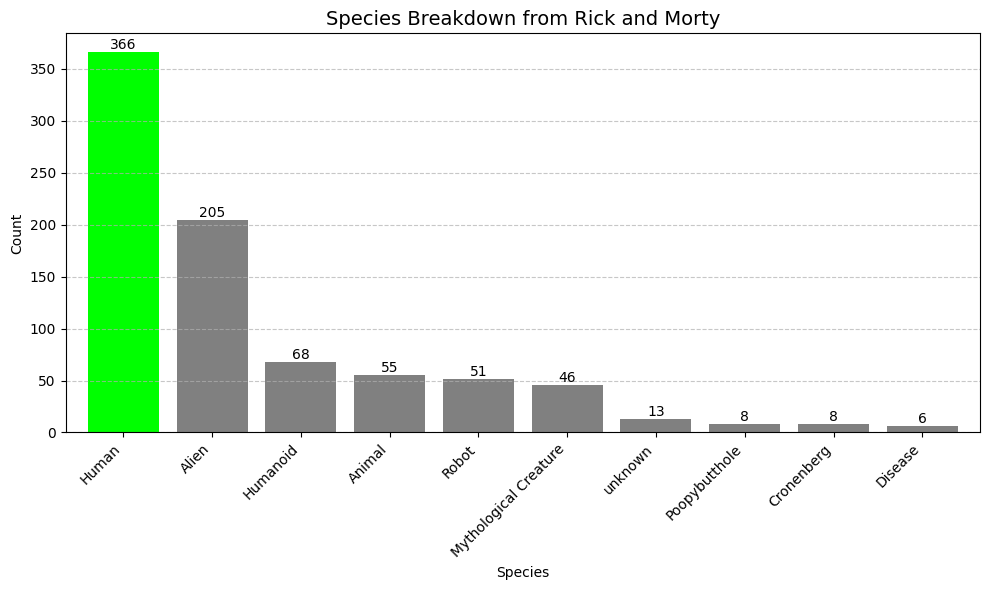

In [ ]:
species_counts = cleaned_rnm['species'].value_counts()

# colors to higlight the most popular species
colors = ['#00FF00' if i == 0 else '#808080' for i in range(len(species_counts))]  # Example of using green for the most common species

fig, ax = plt.subplots(figsize=(10, 6))
ax = species_counts.plot.bar(color=colors, ax=ax, width=0.8)

# Add data labels
ax.bar_label(ax.containers[0])

# title and labels
plt.title('Species Breakdown from Rick and Morty', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Species')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [184]:
def plot_species_breakdown(cleaned_rnm: pd.DataFrame) -> None:
    """
    Plots a bar chart showing the breakdown of species in the dataset.

    This function generates a bar chart of the species counts, highlighting the
    most popular species with a distinct color (green), while other species are
    shown in gray. It also adds data labels to the bars for better clarity.

    Args:
        cleaned_rnm (pd.DataFrame): A DataFrame containing the 'species' column.

    Returns:
        None: The function generates and displays a bar chart.
    """
    # Count the values in 'species'
    species_counts = cleaned_rnm['species'].value_counts()

    # Colors to highlight the most popular species
    colors = ['#00FF00' if i == 0 else '#808080' for i in range(len(species_counts))]  # Green for most common species

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax = species_counts.plot.bar(color=colors, ax=ax, width=0.8)

    # Add data labels
    ax.bar_label(ax.containers[0])

    # Title and labels
    plt.title('Species Breakdown from Rick and Morty', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Species')
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()


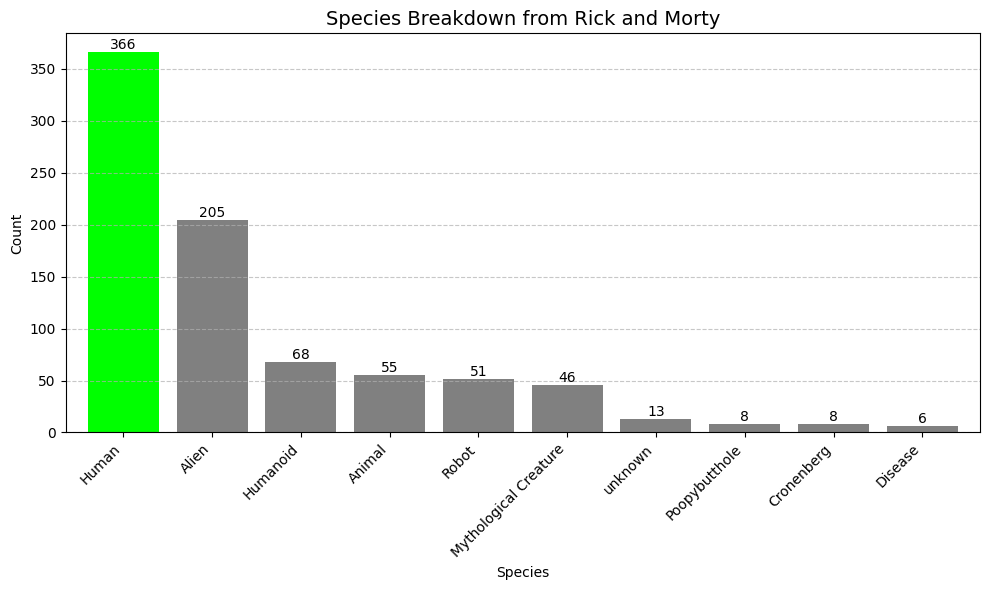

In [185]:
plot_species_breakdown(cleaned_rnm)